In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el costo de una función de hipótesis dada
def compute_cost(X, y, w):
    m = len(y)  # Número de ejemplos de entrenamiento
    h = X.dot(w)  # Predicciones del modelo
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)  # Cálculo del costo (Error Cuadrático Medio)
    return cost

# Función para graficar la historia del costo
def plot_cost_history(cost_history, title):
    plt.plot(range(len(cost_history)), cost_history, 'b.')  # Graficar el costo en cada iteración
    plt.xlabel('Número de Iteraciones')  # Etiqueta del eje X
    plt.ylabel('Costo')  # Etiqueta del eje Y
    plt.title(title)  # Título del gráfico
    plt.show()  # Mostrar gráfico


Parámetros optimizados (BGD): [0.11071521 0.95129619]
Costo final (BGD): 0.0008792330054913394


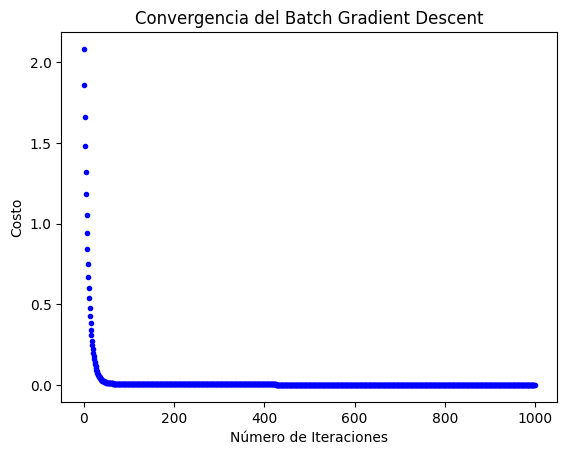

In [2]:
# Función para Batch Gradient Descent
def batch_gradient_descent(X, y, w, learning_rate, iterations):
    m = len(y)  # Número de ejemplos de entrenamiento
    cost_history = np.zeros(iterations)  # Inicializar historia de costos
    
    for i in range(iterations):
        gradient = X.T.dot(X.dot(w) - y) / m  # Calcular el gradiente
        w = w - learning_rate * gradient  # Actualizar los parámetros
        cost_history[i] = compute_cost(X, y, w)  # Guardar el costo en la iteración actual
    
    return w, cost_history

# Datos de ejemplo para Batch Gradient Descent
X = np.array([[1, 1], [1, 2], [1, 3]])  # Matriz de características (con término de sesgo)
y = np.array([1, 2, 3])  # Vector de etiquetas
w = np.zeros(2)  # Inicializar los parámetros a cero
learning_rate = 0.01  # Tasa de aprendizaje
iterations = 1000  # Número de iteraciones

w_bgd, cost_history_bgd = batch_gradient_descent(X, y, w, learning_rate, iterations)  # Ejecutar BGD
print(f'Parámetros optimizados (BGD): {w_bgd}')
print(f'Costo final (BGD): {cost_history_bgd[-1]}')

plot_cost_history(cost_history_bgd, 'Convergencia del Batch Gradient Descent')  # Graficar historia de costos


Parámetros optimizados (SGD): [0.01084765 0.99535883]
Costo final (SGD): 8.405251509916438e-06


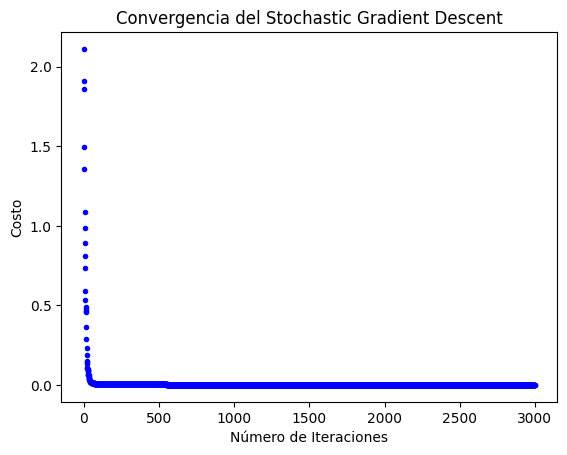

In [3]:
# Función para Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, w, learning_rate, iterations):
    m = len(y)  # Número de ejemplos de entrenamiento
    cost_history = np.zeros(iterations * m)  # Inicializar historia de costos
    
    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)  # Seleccionar un ejemplo aleatorio
            x_i = X[rand_index:rand_index+1]  # Extraer las características del ejemplo seleccionado
            y_i = y[rand_index:rand_index+1]  # Extraer la etiqueta del ejemplo seleccionado
            gradient = x_i.T.dot(x_i.dot(w) - y_i)  # Calcular el gradiente para el ejemplo
            w = w - learning_rate * gradient  # Actualizar los parámetros
            cost_history[i * m + j] = compute_cost(X, y, w)  # Guardar el costo en la iteración actual
    
    return w, cost_history

# Datos de ejemplo para Stochastic Gradient Descent
w = np.zeros(2)  # Inicializar los parámetros a cero
learning_rate = 0.01  # Tasa de aprendizaje
iterations = 1000  # Número de iteraciones

w_sgd, cost_history_sgd = stochastic_gradient_descent(X, y, w, learning_rate, iterations)  # Ejecutar SGD
print(f'Parámetros optimizados (SGD): {w_sgd}')
print(f'Costo final (SGD): {cost_history_sgd[-1]}')

plot_cost_history(cost_history_sgd, 'Convergencia del Stochastic Gradient Descent')  # Graficar historia de costos


Parámetros optimizados (Mini-batch GD): [0.05994398 0.9736807 ]
Costo final (Mini-batch GD): 0.0002575861657410813


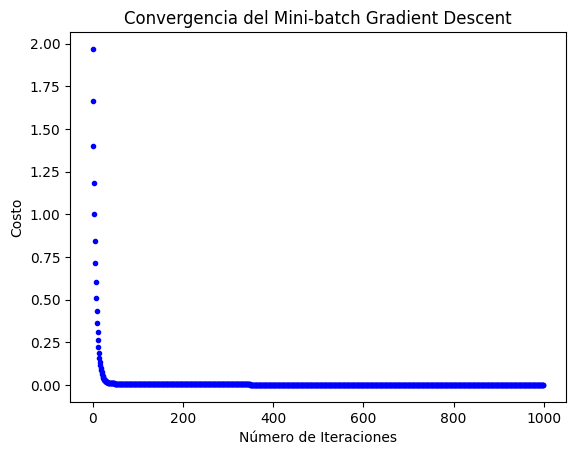

In [4]:
# Función para Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, w, learning_rate, iterations, batch_size):
    m = len(y)  # Número de ejemplos de entrenamiento
    cost_history = np.zeros(iterations)  # Inicializar historia de costos
    
    for i in range(iterations):
        indices = np.random.permutation(m)  # Permutar aleatoriamente los índices
        X_shuffled = X[indices]  # Barajar las características
        y_shuffled = y[indices]  # Barajar las etiquetas
        
        for j in range(0, m, batch_size):
            X_mini = X_shuffled[j:j+batch_size]  # Extraer un mini-batch
            y_mini = y_shuffled[j:j+batch_size]  # Extraer etiquetas correspondientes
            gradient = X_mini.T.dot(X_mini.dot(w) - y_mini) / batch_size  # Calcular el gradiente del mini-batch
            w = w - learning_rate * gradient  # Actualizar los parámetros
        
        cost_history[i] = compute_cost(X, y, w)  # Guardar el costo en la iteración actual
    
    return w, cost_history

# Datos de ejemplo para Mini-batch Gradient Descent
w = np.zeros(2)  # Inicializar los parámetros a cero
learning_rate = 0.01  # Tasa de aprendizaje
iterations = 1000  # Número de iteraciones
batch_size = 2  # Tamaño del mini-batch

w_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X, y, w, learning_rate, iterations, batch_size)  # Ejecutar Mini-batch GD
print(f'Parámetros optimizados (Mini-batch GD): {w_mbgd}')
print(f'Costo final (Mini-batch GD): {cost_history_mbgd[-1]}')

plot_cost_history(cost_history_mbgd, 'Convergencia del Mini-batch Gradient Descent')  # Graficar historia de costos
